# Project Image Classification

We have scrapped the images from amazon then i have dropped some images manually from it in order to make it a balanced dataset.

# Import Modules

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

# Unzipping the data

In [2]:
#inzipping the folder of images
!unzip Images.zip

Archive:  Images.zip
   creating: Images/jeans+for+men/
 extracting: Images/jeans+for+men/pic_0.jpg  
  inflating: Images/jeans+for+men/pic_1.jpg  
 extracting: Images/jeans+for+men/pic_10.jpg  
  inflating: Images/jeans+for+men/pic_100.jpg  
  inflating: Images/jeans+for+men/pic_101.jpg  
 extracting: Images/jeans+for+men/pic_102.jpg  
 extracting: Images/jeans+for+men/pic_103.jpg  
  inflating: Images/jeans+for+men/pic_104.jpg  
  inflating: Images/jeans+for+men/pic_105.jpg  
  inflating: Images/jeans+for+men/pic_106.jpg  
 extracting: Images/jeans+for+men/pic_107.jpg  
  inflating: Images/jeans+for+men/pic_108.jpg  
  inflating: Images/jeans+for+men/pic_109.jpg  
  inflating: Images/jeans+for+men/pic_110.jpg  
  inflating: Images/jeans+for+men/pic_111.jpg  
 extracting: Images/jeans+for+men/pic_112.jpg  
  inflating: Images/jeans+for+men/pic_113.jpg  
  inflating: Images/jeans+for+men/pic_114.jpg  
  inflating: Images/jeans+for+men/pic_115.jpg  
  inflating: Images/jeans+for+men/pic

# Creating the dataset for input and output

In [3]:
# storing the path of images and their labels in 2 lists
input_path = []
label = []

for class_name in os.listdir("Images"):
    for path in os.listdir("Images/"+class_name):
        if class_name == 'jeans+for+men':
            label.append(0)

        elif class_name == 'saree':
            label.append(1)
          
        elif class_name == 'trousers+for+men' :
            label.append(2)
        input_path.append(os.path.join("Images", class_name, path))
print(input_path[0], label[0])

Images/jeans+for+men/pic_180.jpg 0


In [4]:
# making a dataframe
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df

images  label
0                Images/saree/pic_334.jpg      1
1        Images/jeans+for+men/pic_278.jpg      0
2        Images/jeans+for+men/pic_122.jpg      0
3                  Images/saree/pic_9.jpg      1
4                Images/saree/pic_265.jpg      1
...                                   ...    ...
1100             Images/saree/pic_297.jpg      1
1101     Images/jeans+for+men/pic_168.jpg      0
1102             Images/saree/pic_349.jpg      1
1103  Images/trousers+for+men/pic_107.jpg      2
1104              Images/saree/pic_17.jpg      1

[1105 rows x 2 columns]

In [5]:
# checking if any thumnail is present instead of jpg
for i in df['images']:
    if '.jpg' not in i:
        print(i)

In [6]:
# checking if any corrupt image is present in dataset which is not opening
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

[]

# Exploratory Data Analysis

0    377
1    370
2    358
Name: label, dtype: int64


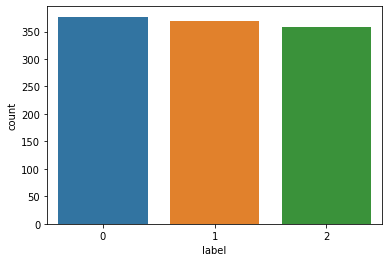

In [7]:
# checking the valuecounts of images of each class
import seaborn as sns
sns.countplot(df['label'])
print(df['label'].value_counts())

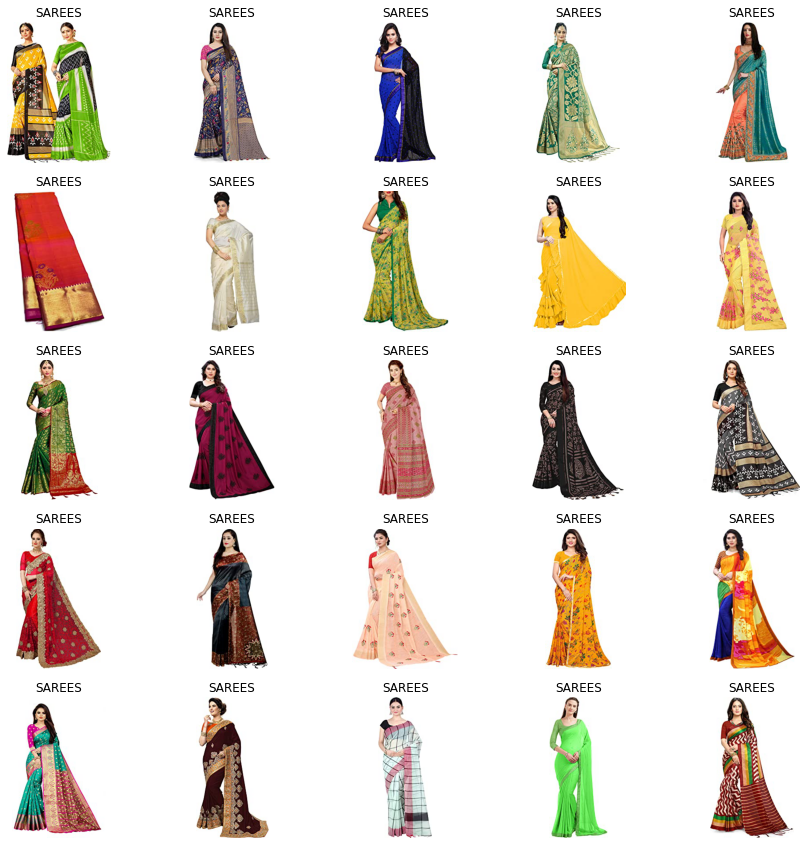

In [8]:
# to display grid of images of Sarees
plt.figure(figsize=(15,15))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('SAREES')
    plt.axis('off')

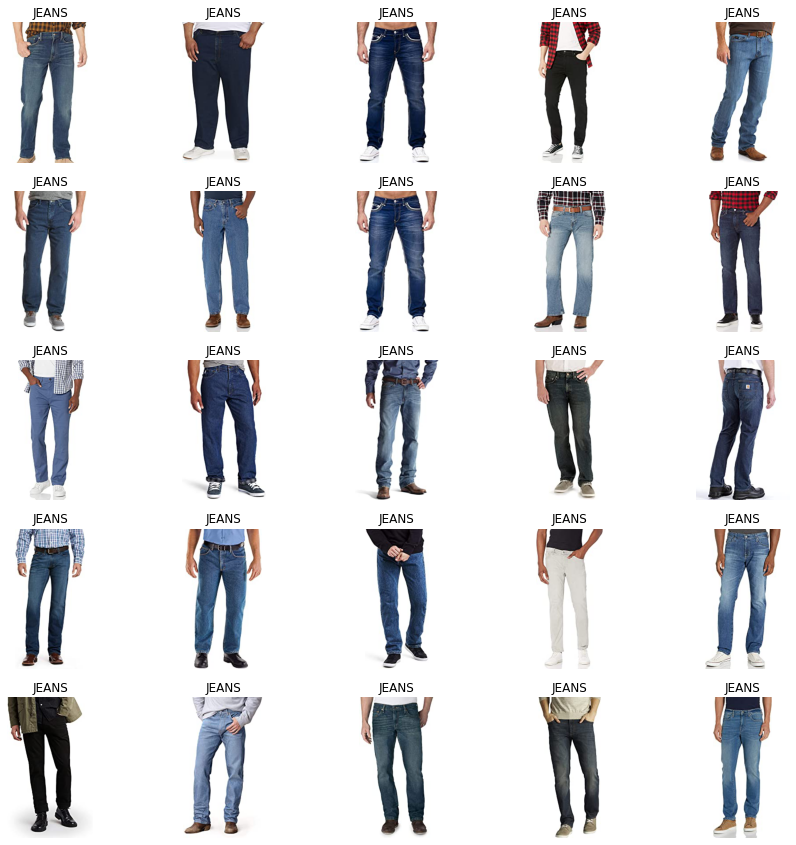

In [9]:
# to display grid of images of Jeans
plt.figure(figsize=(15,15))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('JEANS')
    plt.axis('off')

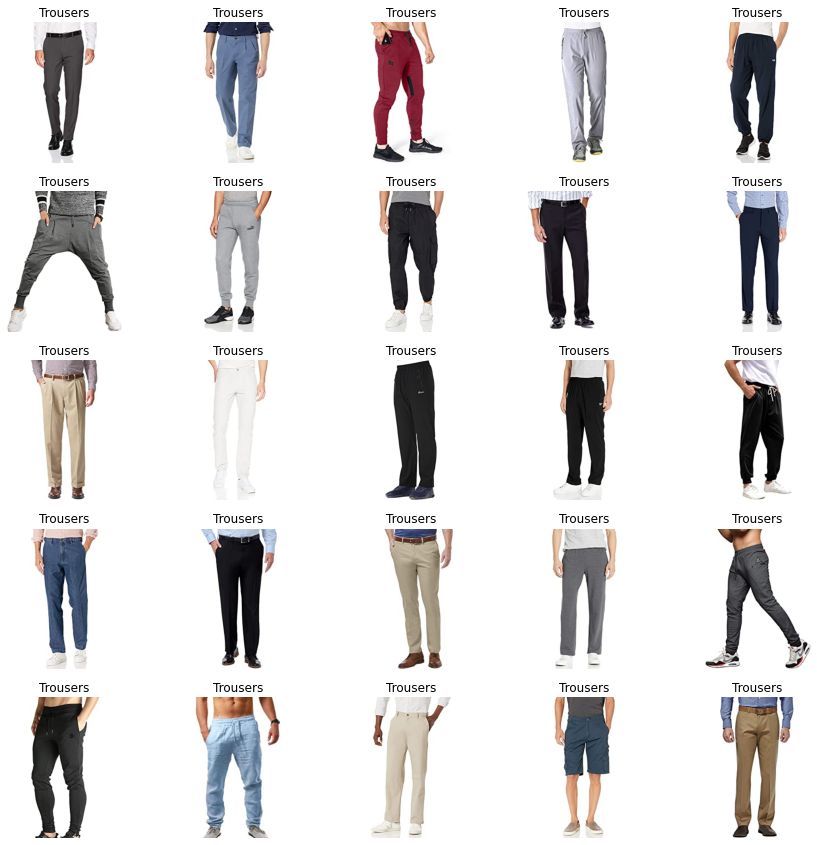

In [10]:
# to display grid of images of trousers
plt.figure(figsize=(15,15))
temp = df[df['label']==2]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Trousers')
    plt.axis('off')

In [11]:
#converting label datatype as string
df['label'] = df['label'].astype('str')
df.head()

images label
0          Images/saree/pic_334.jpg     1
1  Images/jeans+for+men/pic_278.jpg     0
2  Images/jeans+for+men/pic_122.jpg     0
3            Images/saree/pic_9.jpg     1
4          Images/saree/pic_265.jpg     1

# Spliting the dataset into train and test

In [12]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Creating DataGenerator for the images

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,

)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(224,224), 
    batch_size=64, 
    class_mode='categorical'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(224,224), 
    batch_size=64, 
    class_mode='categorical'
)

Found 884 validated image filenames belonging to 3 classes.
Found 221 validated image filenames belonging to 3 classes.


# Model Creation

### Model1: CNN(Convolution Neural Network)

In [14]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model1 = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(3, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [15]:
history1 = model1.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
14/14 [==============================] - 49s 2s/step - loss: 2.8882 - accuracy: 0.3218 - val_loss: 0.8290 - val_accuracy: 0.5928
Epoch 2/10
14/14 [==============================] - 35s 2s/step - loss: 0.6900 - accuracy: 0.6801 - val_loss: 0.3418 - val_accuracy: 0.8778
Epoch 3/10
14/14 [==============================] - 35s 2s/step - loss: 0.4179 - accuracy: 0.8438 - val_loss: 0.3053 - val_accuracy: 0.8552
Epoch 4/10
14/14 [==============================] - 35s 2s/step - loss: 0.3269 - accuracy: 0.8861 - val_loss: 0.3017 - val_accuracy: 0.8552
Epoch 5/10
14/14 [==============================] - 34s 2s/step - loss: 0.3301 - accuracy: 0.8583 - val_loss: 0.2401 - val_accuracy: 0.9050
Epoch 6/10
14/14 [==============================] - 35s 2s/step - loss: 0.2923 - accuracy: 0.8878 - val_loss: 0.2336 - val_accuracy: 0.9050
Epoch 7/10
14/14 [==============================] - 35s 2s/step - loss: 0.3033 - accuracy: 0.8753 - val_loss: 0.2154 - val_accuracy: 0.9095
Epoch 8/10
14/14 [==

### Visualization of results

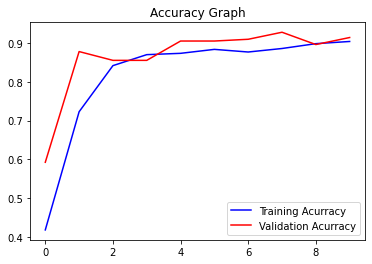

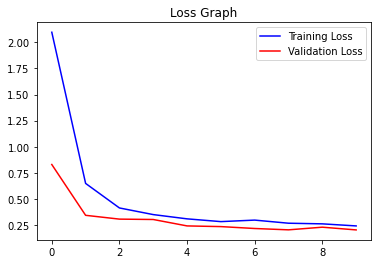

In [16]:
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Acurracy')
plt.plot(epochs,val_acc,'r',label='Validation Acurracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss=history1.history['loss']
val_loss=history1.history['val_loss']
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

### Model2: VGG16

In [17]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

In [18]:
IMAGE_SIZE = [224,224]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# dont train existing weight
for layer in vgg.layers:
  layer.trainable=False

# our layers....you can add more if you want
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

# create a model object
model2 = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model2.summary()

# tell the model what cost and opyimization to be used
model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [19]:
history2 = model2.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
14/14 [==============================] - 410s 30s/step - loss: 5.4475 - accuracy: 0.5628 - val_loss: 0.5193 - val_accuracy: 0.8009
Epoch 2/10
14/14 [==============================] - 408s 29s/step - loss: 0.5033 - accuracy: 0.8276 - val_loss: 0.2410 - val_accuracy: 0.8778
Epoch 3/10
14/14 [==============================] - 408s 29s/step - loss: 0.2967 - accuracy: 0.9065 - val_loss: 0.3811 - val_accuracy: 0.8643
Epoch 4/10
14/14 [==============================] - 407s 29s/step - loss: 0.1907 - accuracy: 0.9185 - val_loss: 0.2152 - val_accuracy: 0.9050
Epoch 5/10
14/14 [==============================] - 407s 29s/step - loss: 0.2009 - accuracy: 0.9285 - val_loss: 0.1761 - val_accuracy: 0.9321
Epoch 6/10
14/14 [==============================] - 408s 30s/step - loss: 0.2456 - accuracy: 0.9162 - val_loss: 0.2487 - val_accuracy: 0.9321
Epoch 7/10
14/14 [==============================] - 409s 30s/step - loss: 0.1994 - accuracy: 0.9347 - val_loss: 0.2069 - val_accuracy: 0.9412
Epoch 

### Visualization of results

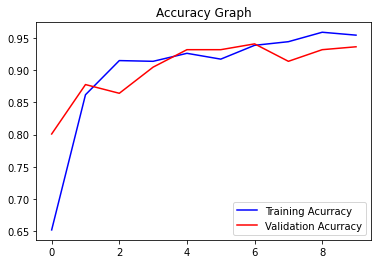

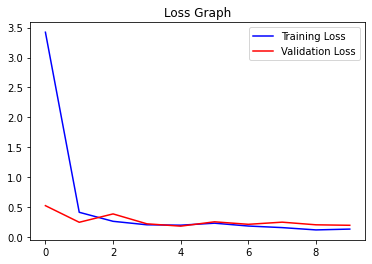

In [20]:
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Acurracy')
plt.plot(epochs,val_acc,'r',label='Validation Acurracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss=history2.history['loss']
val_loss=history2.history['val_loss']
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

### Model3: VGG16(without 1000 Dense layers)

In [21]:
IMAGE_SIZE = [224,224]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# dont train existing weight
for layer in vgg.layers:
  layer.trainable=False

# our layers....you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

# create a model object
model3 = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model3.summary()

# tell the model what cost and opyimization to be used
model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [22]:
history3 = model3.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
14/14 [==============================] - 407s 29s/step - loss: 1.1489 - accuracy: 0.4932 - val_loss: 0.7051 - val_accuracy: 0.6742
Epoch 2/10
14/14 [==============================] - 405s 29s/step - loss: 0.5384 - accuracy: 0.7649 - val_loss: 0.2625 - val_accuracy: 0.8688
Epoch 3/10
14/14 [==============================] - 405s 30s/step - loss: 0.2578 - accuracy: 0.8937 - val_loss: 0.2136 - val_accuracy: 0.9050
Epoch 4/10
14/14 [==============================] - 405s 29s/step - loss: 0.2154 - accuracy: 0.9049 - val_loss: 0.1922 - val_accuracy: 0.9231
Epoch 5/10
14/14 [==============================] - 405s 29s/step - loss: 0.1842 - accuracy: 0.9309 - val_loss: 0.1810 - val_accuracy: 0.9321
Epoch 6/10
14/14 [==============================] - 405s 29s/step - loss: 0.1545 - accuracy: 0.9354 - val_loss: 0.1700 - val_accuracy: 0.9367
Epoch 7/10
14/14 [==============================] - 405s 29s/step - loss: 0.1501 - accuracy: 0.9377 - val_loss: 0.1589 - val_accuracy: 0.9412
Epoch 

### Visualization of results

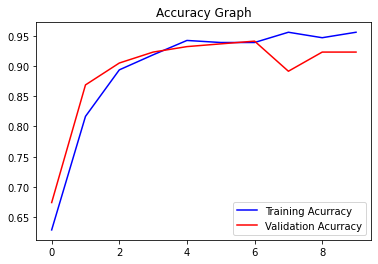

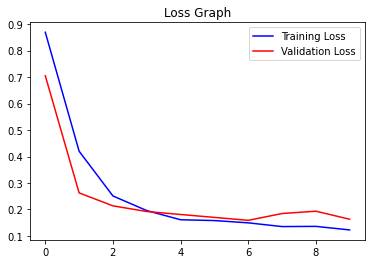

In [23]:
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Acurracy')
plt.plot(epochs,val_acc,'r',label='Validation Acurracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss=history3.history['loss']
val_loss=history3.history['val_loss']
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# Saving the Final Model

##### We have seen in the results that both model2 and model3 are givinh highest val_acuuracy 94.12 bt model 3 is giving low val_loss as compare to model 2 so I choose model3 as our final model

In [24]:
from keras.models import load_model

model3.save('my_model.h5')